# Initial time series analysis

In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, date, time
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [2]:
# Loading formatted data
data_folder = '../../data/generated/'
actor_df = pd.read_pickle(data_folder + 'actor_df.pkl')
appears_in_df = pd.read_pickle(data_folder + 'appears_in_df.pkl')
belongs_to_df = pd.read_pickle(data_folder + 'belongs_to_df.pkl')
character_df = pd.read_pickle(data_folder + 'character_df.pkl')
comes_from_df = pd.read_pickle(data_folder + 'comes_from_df.pkl')
country_df = pd.read_pickle(data_folder + 'country_df.pkl')
genre_df = pd.read_pickle(data_folder + 'genre_df.pkl')
is_of_type_df = pd.read_pickle(data_folder + 'is_of_type_df.pkl')
language_df = pd.read_pickle(data_folder + 'language_df.pkl')
movie_df = pd.read_pickle(data_folder + 'movie_df.pkl')
play_df = pd.read_pickle(data_folder + 'play_df.pkl')
spoken_languages_df = pd.read_pickle(data_folder + 'spoken_languages_df.pkl')

## Summary of dropped values count


| Dataframes | Attribute involve | Dropped data types | Remaining data for analysis |
| :--- | :---: | :---: | :---: | 
| movie_df | Movie | |  **81'741**  |
| movie_df | Release date  | NaN | **74'838**  |
||||
| movie_df | Revenue | NaN | 8'327 |
| movie_df | Runtime | NaN, 0, 1.079281e+06 | 58'628 |
| actor_df | Actor | |  **436'509**  |
| actor_df | Actor Age | NaN, negative age | 289'416 |
| actor_df | Actor Height | NaN, huge height (>3) | 149'529 |
| actor_df | Actor Gender | NaN | 391'890 |

## Time series analysis

In [3]:
movie_df

,name,release_date,revenue,runtime,freebase_id,plot
movie_id,,,,,,
975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,/m/03vyhn,"Set in the second half of the 22nd century, th..."
3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,/m/08yl5d,NaN
28463795,Brun bitter,1988,NaN,83.0,/m/0crgdbh,NaN
9363483,White Of The Eye,1987,NaN,110.0,/m/0285_cd,A series of murders of rich young women throug...
261236,A Woman in Flames,1983,NaN,106.0,/m/01mrr1,"Eva, an upper class housewife, becomes frustra..."
...,...,...,...,...,...,...
35228177,Mermaids: The Body Found,2011-03-19,NaN,120.0,/m/0j7hxnt,Two former National Oceanic Atmospheric Admini...
34980460,Knuckle,2011-01-21,NaN,96.0,/m/0g4pl34,{{No plot}} This film follows 12 years in the ...
9971909,Another Nice Mess,1972-09-22,NaN,66.0,/m/02pygw1,NaN


### Release year formatting

In [4]:
movie_df['release_year'] = pd.to_datetime(movie_df.release_date, errors='coerce') # If missing day and month, -> YYYY-01-01

In [5]:
movie_df['release_year'] = movie_df.release_year.dt.strftime('%Y') # format date to year for seaborn
movie_df = movie_df.dropna(subset=['release_year']) # drop missing year release
movie_df = movie_df.sort_values(by='release_year') # sort by year

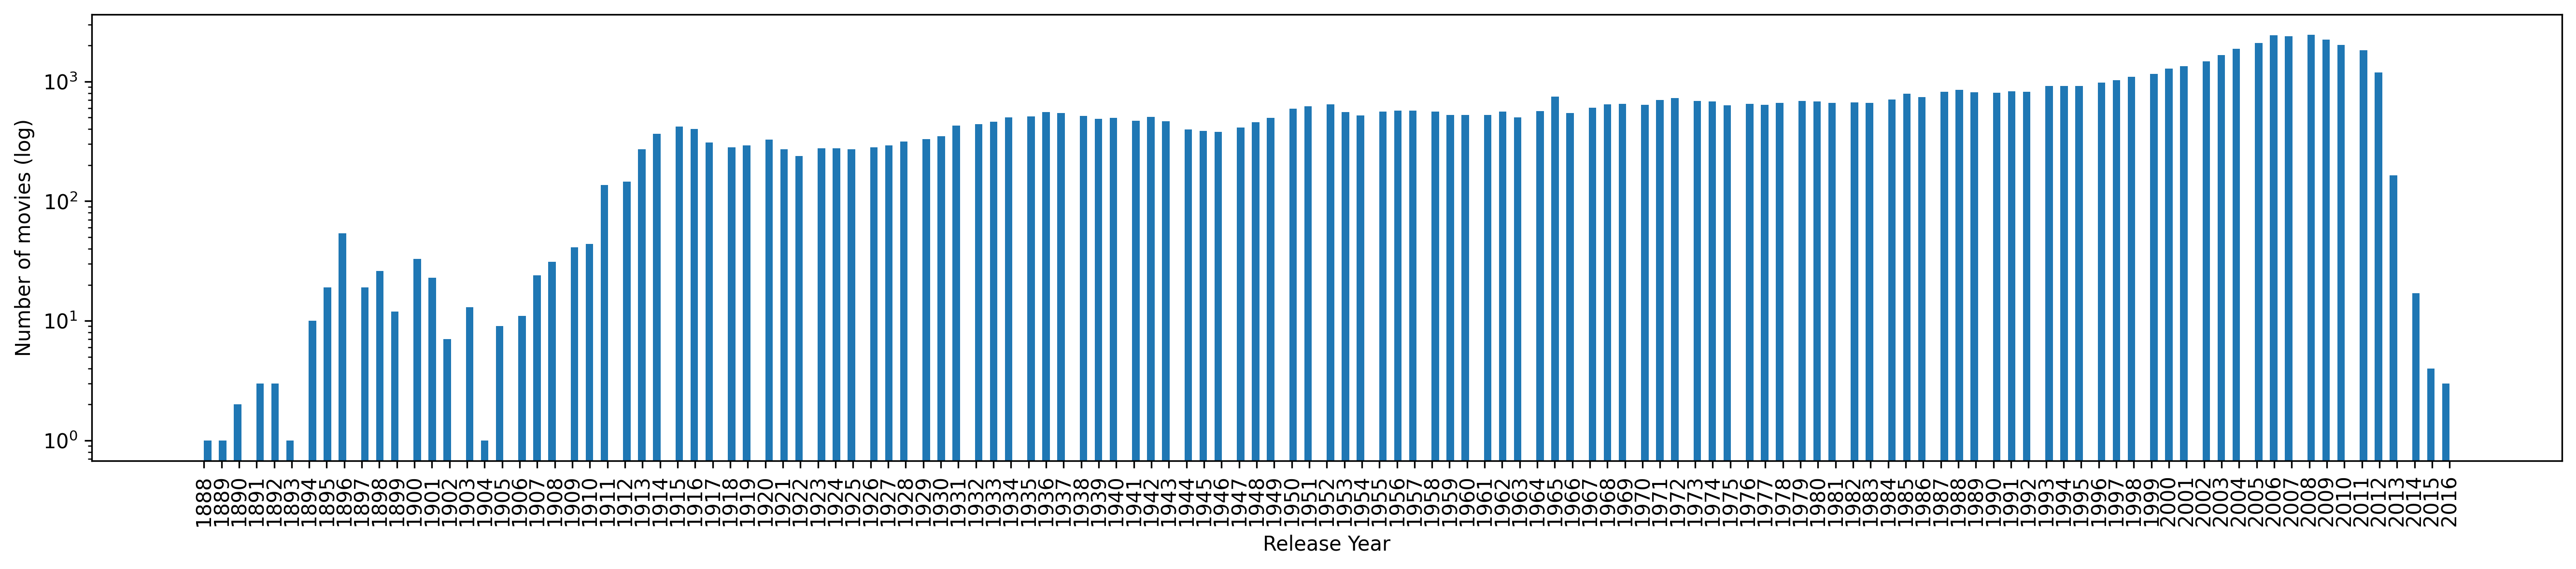

In [6]:
plt.figure(figsize=(22,4))
plt.hist(movie_df['release_year'], bins=300, log=True)
plt.xlabel('Release Year')
plt.ylabel('Number of movies (log)')
plt.tick_params(axis='x', rotation=90)

### Revenue

In [7]:
movie_revenue = movie_df.dropna(subset=['revenue'])[['revenue', 'release_year']]
movie_revenue

,revenue,release_year
movie_id,,
28703057,100000.0,1897
1762869,244700.0,1914
15340505,1000000.0,1914
15130915,1500000.0,1914
14613957,87028.0,1914
...,...,...
31795894,138942405.0,2012
31462588,64466140.0,2012
31631257,234736898.0,2012


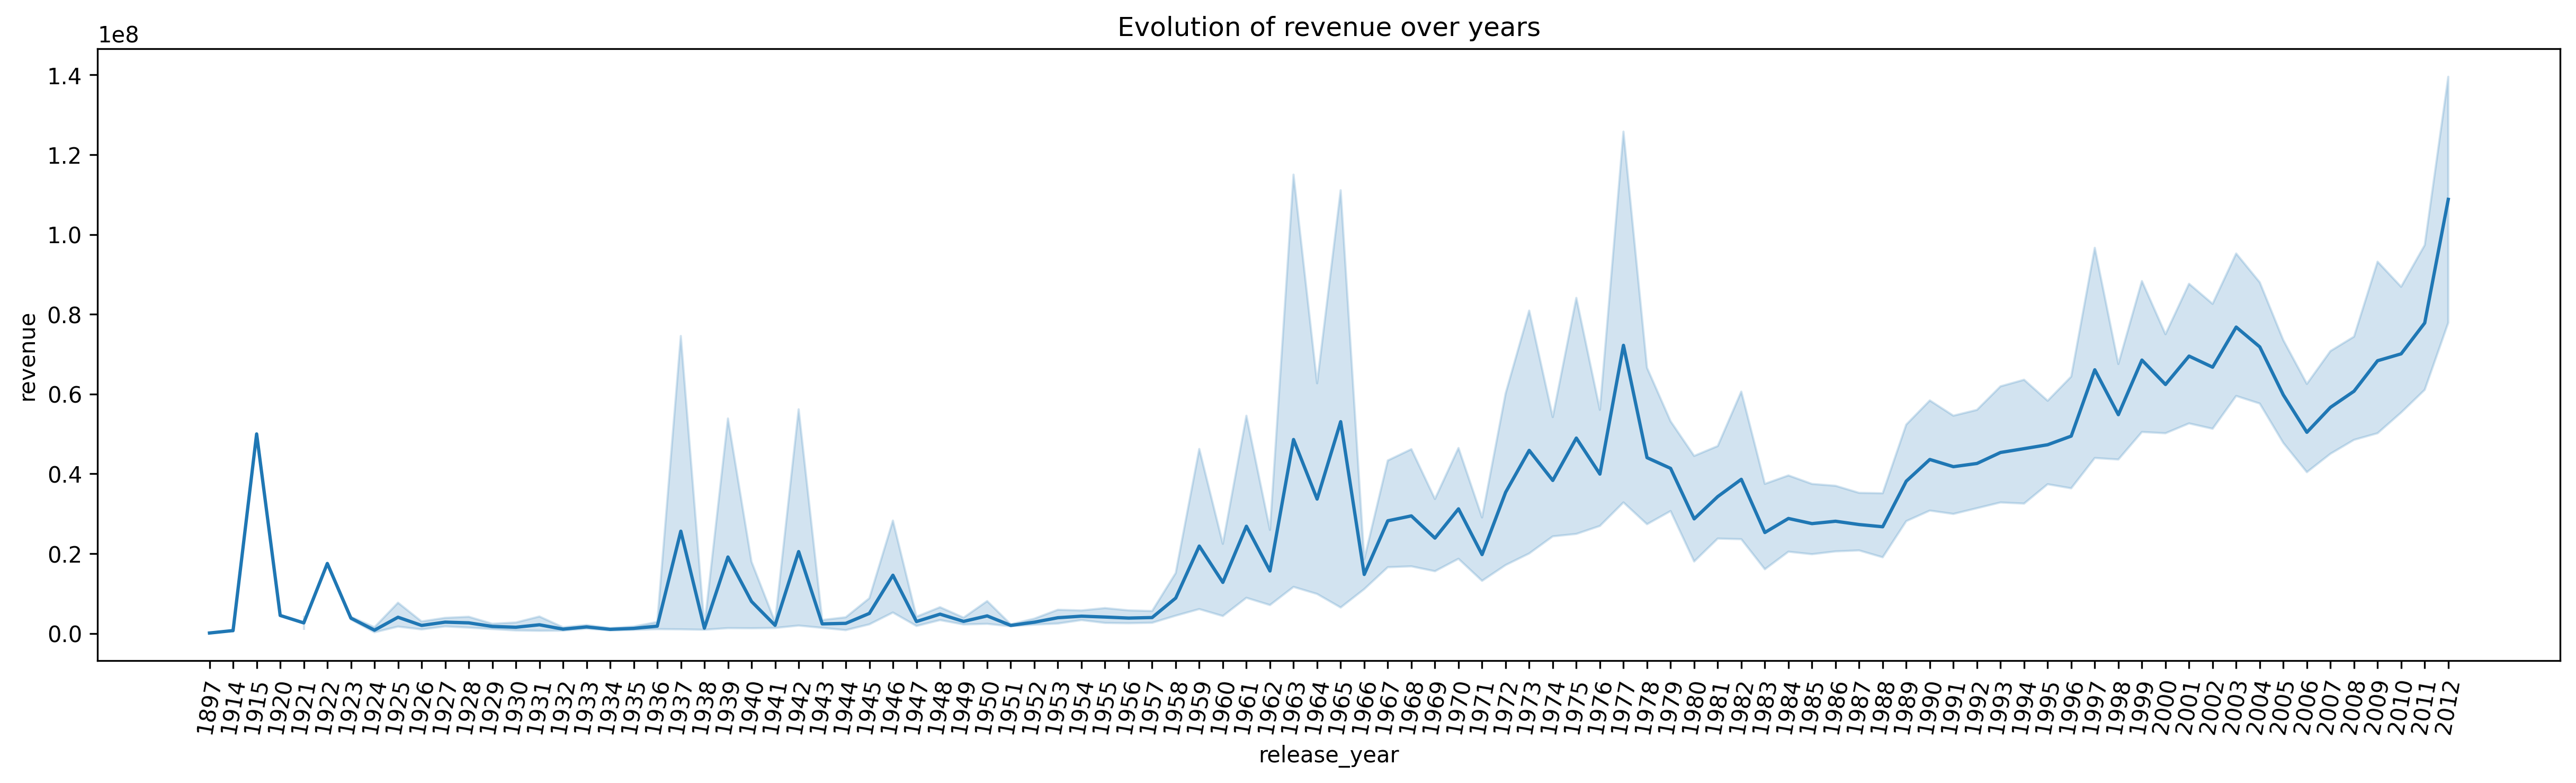

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Evolution of revenue over years')
sns.lineplot(data=movie_revenue, x='release_year', y='revenue',legend='brief')
ax.tick_params(axis='x', rotation=80)

### Runtime

In [9]:
movie_runtime = movie_df.dropna(subset=['runtime'])[['runtime', 'release_year']]
# There is one movie with runtime=0 and another with runtime=1.079281e+06
movie_runtime = movie_runtime[(movie_runtime['runtime'] > 0) & (movie_runtime['runtime'] < 1e+04)]

In [10]:
movie_runtime.sort_values('runtime')

,runtime,release_year
movie_id,,
1082508,0.030000,1888
644824,0.050000,1891
32175981,0.083333,1891
1090697,0.083333,1894
10624432,0.100000,1895
...,...,...
884492,2880.000000,1968
36136594,4875.270000,1964
884435,5220.000000,1987


In [11]:
# a wrong runtime
movie_df.loc[10815585]

name                                               Zero Tolerance
release_date                                                 1995
revenue                                                       NaN
runtime                                                 1079281.0
freebase_id                                            /m/02qqy23
plot            After surviving a sneak attack on himself and ...
release_year                                                 1995
Name: 10815585, dtype: object

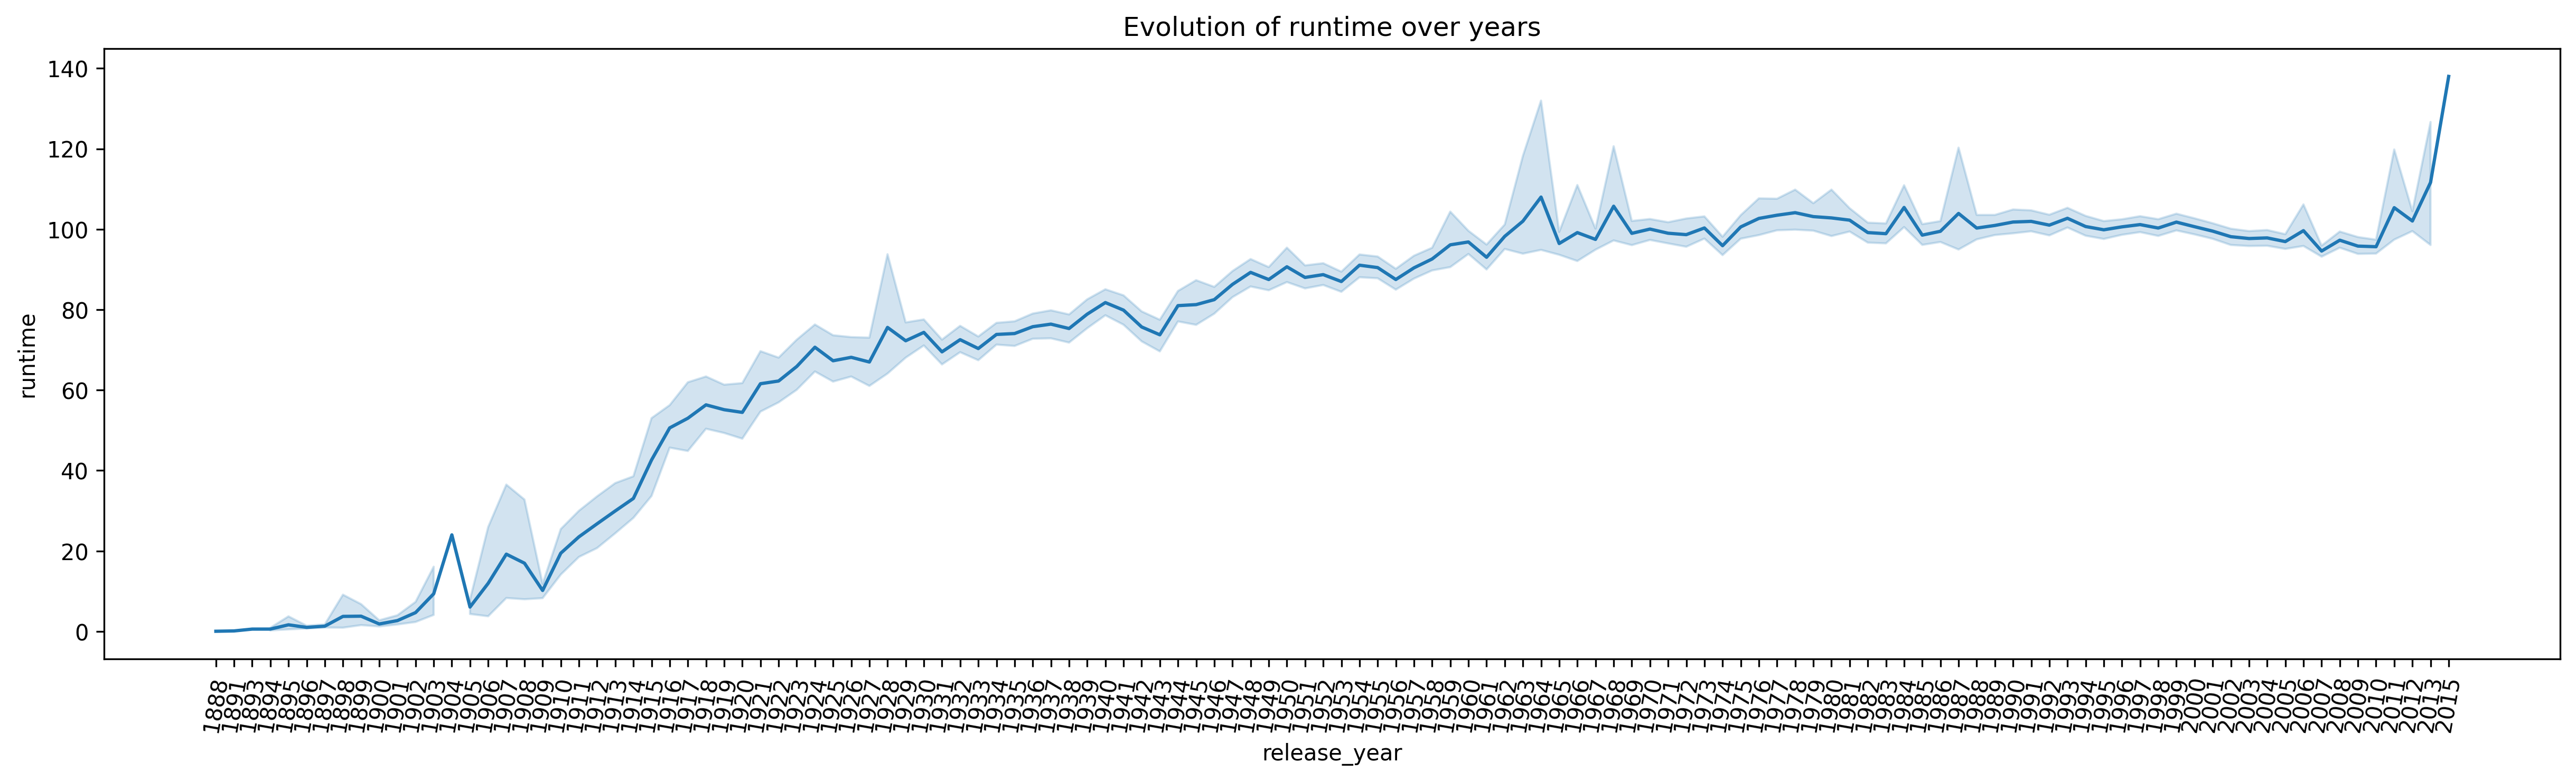

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Evolution of runtime over years')
sns.lineplot(data=movie_runtime, x='release_year', y='runtime',legend='brief')
ax.tick_params(axis='x', rotation=80)

### Actors

In [13]:
movie_actor = pd.merge(pd.merge(actor_df, appears_in_df, on='actor_id'), movie_df, on='movie_id') # 436'509 actors
movie_actor = movie_actor.sort_values('release_year')

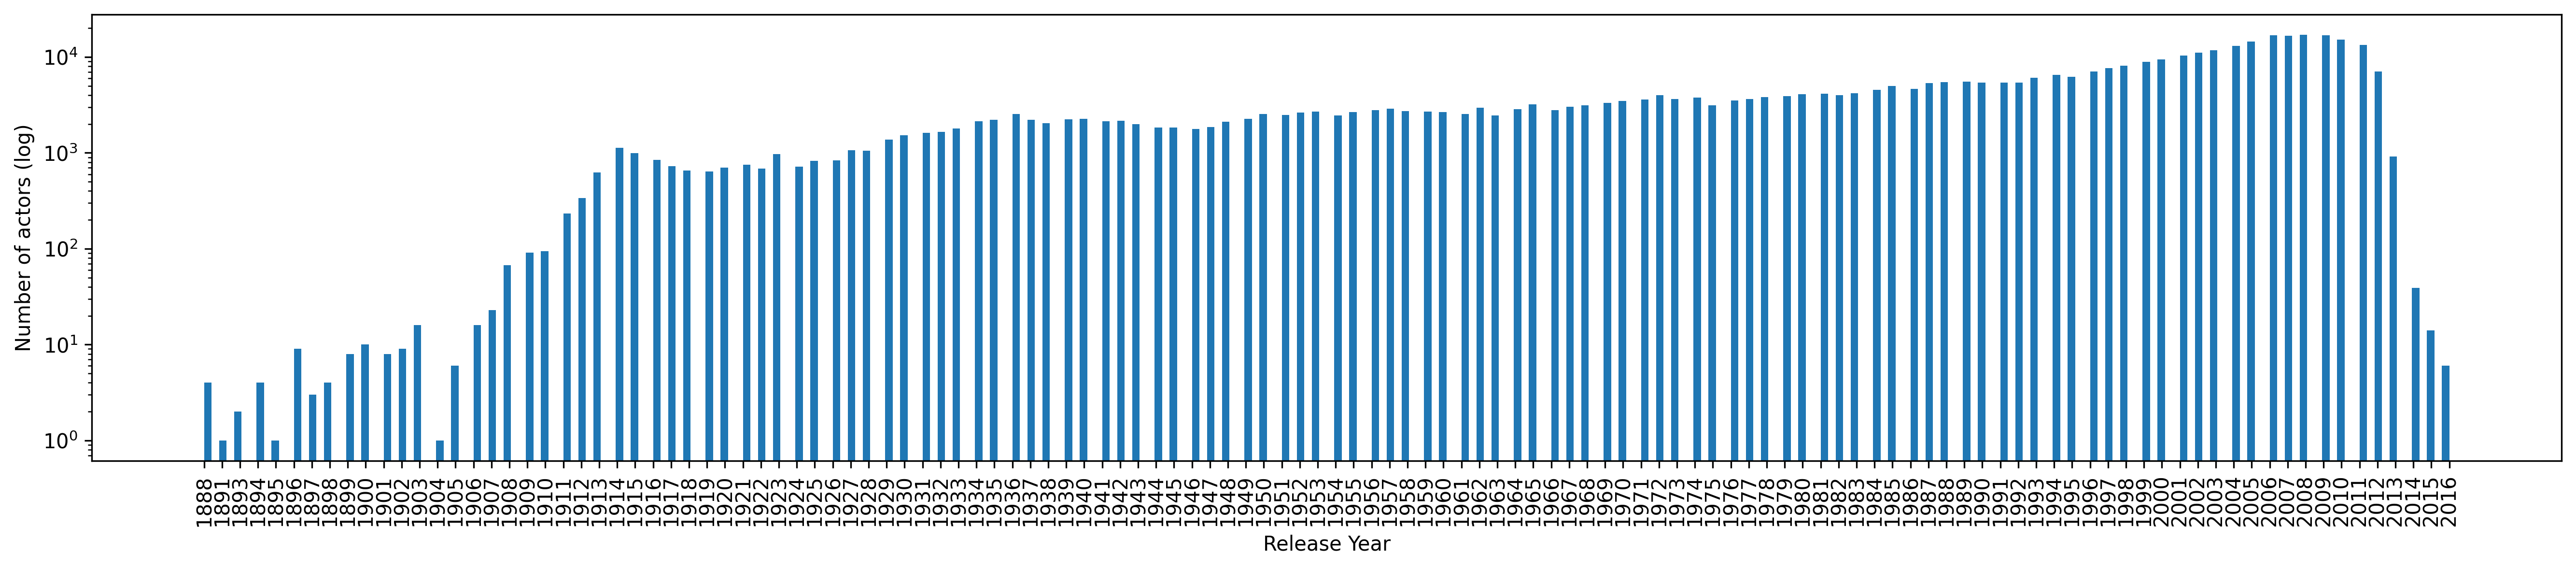

In [14]:
plt.figure(figsize=(22,4))
plt.hist(movie_actor['release_year'], bins=300, log=True)
plt.xlabel('Release Year')
plt.ylabel('Number of actors (log)')
plt.tick_params(axis='x', rotation=90)

In [15]:
movie_actor_age = movie_actor.dropna(subset=['actor_age'])[['actor_age', 'release_year']] # 436'509-146'661 = 289'848
movie_actor_age = movie_actor_age[(movie_actor_age['actor_age'] > 0)] # drop negative actor age -> 289'848-432 = 289'416
movie_actor_age = movie_actor_age.sort_values('release_year')

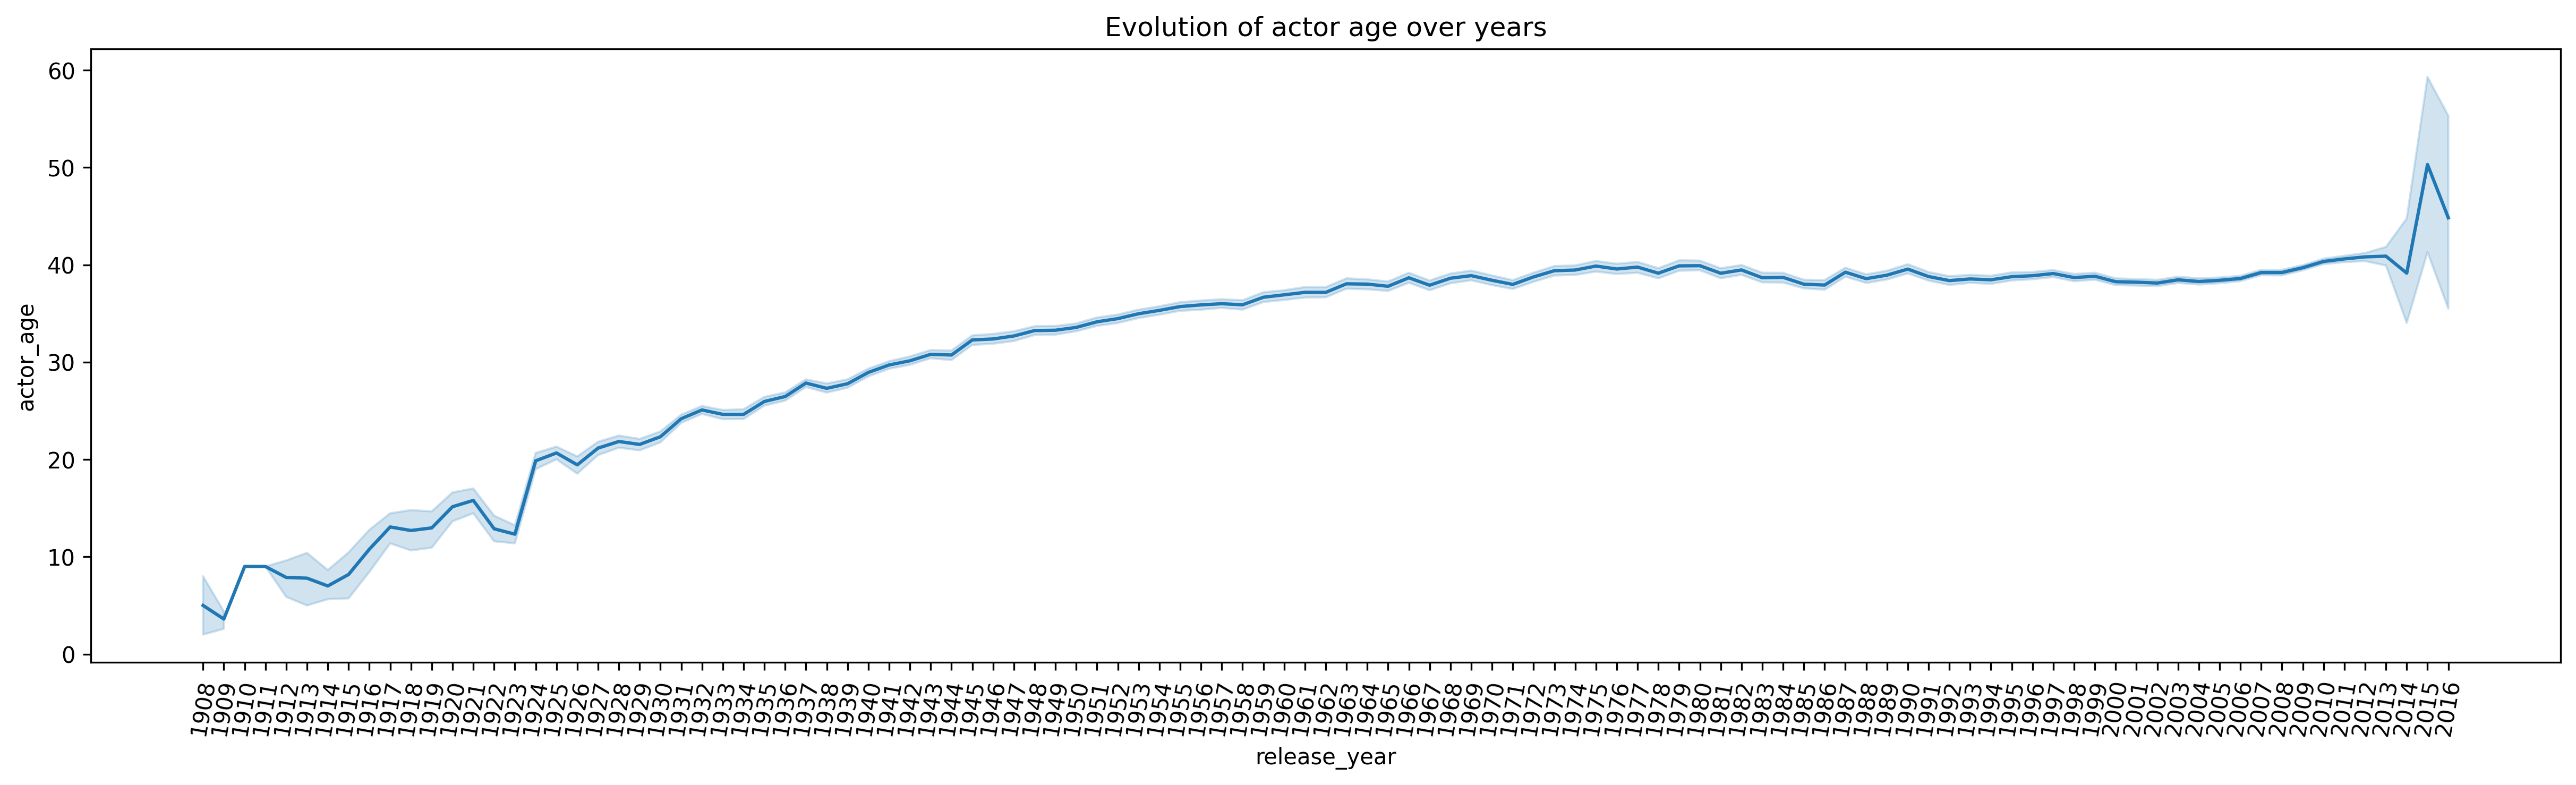

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Evolution of actor age over years')
sns.lineplot(data=movie_actor_age, x='release_year', y='actor_age',legend='brief')
ax.tick_params(axis='x', rotation=80)

In [17]:
movie_actor_height = movie_actor.dropna(subset=['height'])[['height', 'release_year']] # 436'509-286'980 = 149'529
movie_actor_height = movie_actor_height[(movie_actor_height['height'] < 3)] # drop giant creatures
movie_actor_height = movie_actor_height.sort_values('release_year')

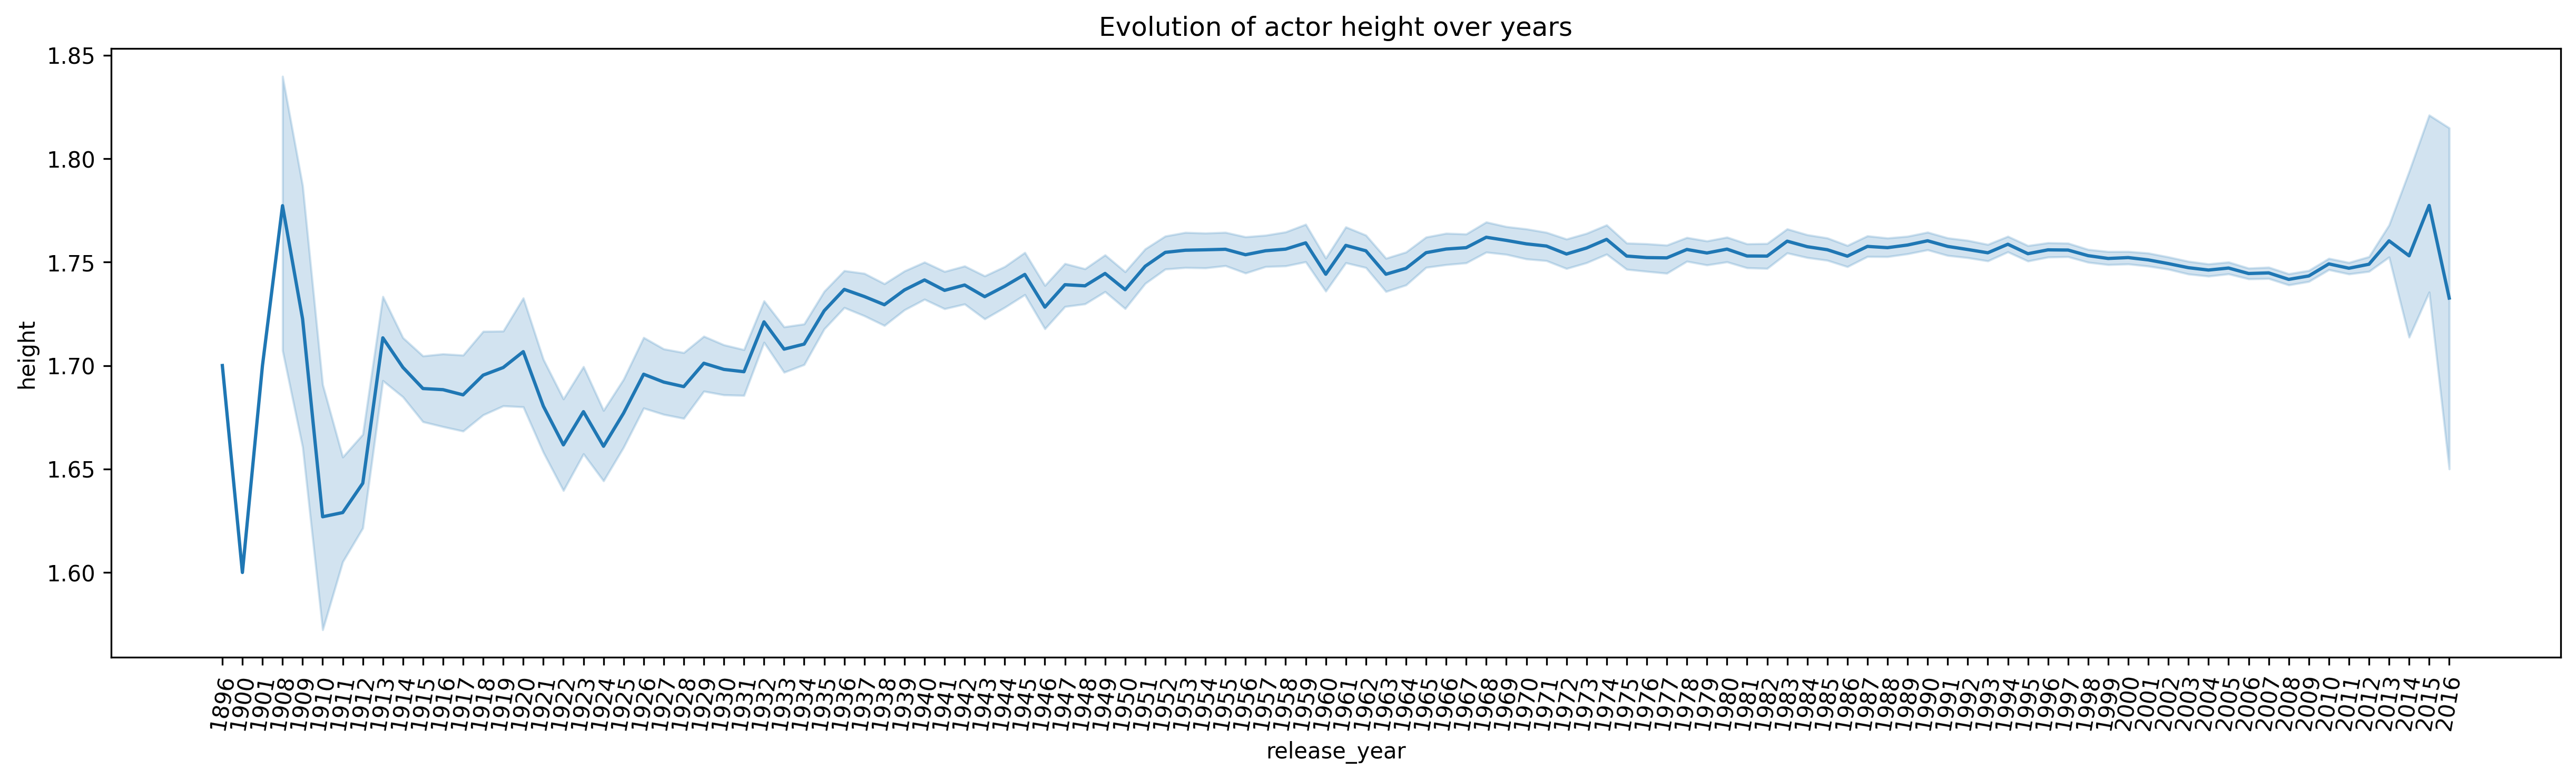

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Evolution of actor height over years')
sns.lineplot(data=movie_actor_height, x='release_year', y='height',legend='brief')
ax.tick_params(axis='x', rotation=80)

In [19]:
movie_actor_gender = movie_actor.dropna(subset=['gender'])[['release_year', 'gender']] # 436'509-44'619 = 391'890
movie_actor_gender = movie_actor_gender.sort_values('release_year')
# One-hot encoding gender
movie_actor_gender['gender'].replace(['M','F'], [0,1], inplace=True)
movie_actor_gender.rename(columns={"gender": "female"}, inplace=True)
movie_actor_gender['male'] = 1-movie_actor_gender['female']

In [20]:
movie_actor_gender = movie_actor_gender.groupby('release_year').mean()

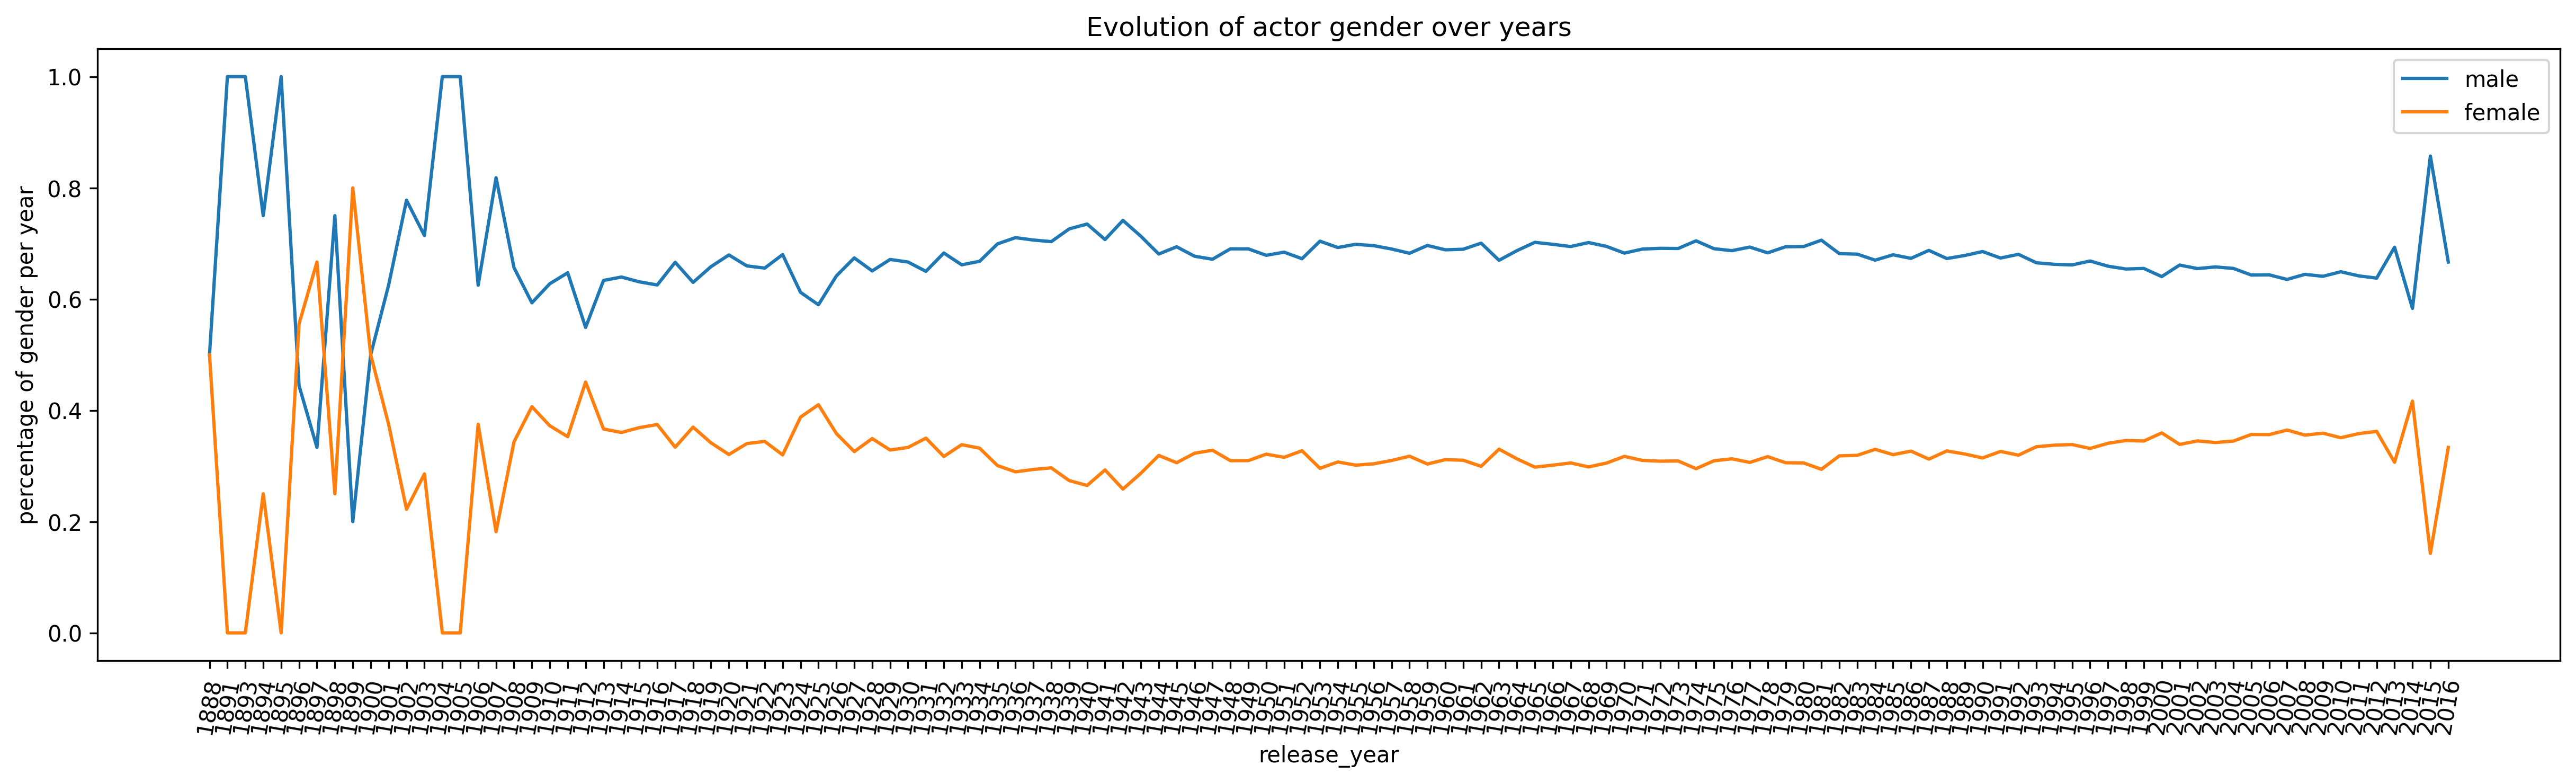

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Evolution of actor gender over years')
ax.set_ylabel('percentage of gender per year')
sns.lineplot(data=movie_actor_gender, x='release_year', y='male', legend='brief', label='male')
sns.lineplot(data=movie_actor_gender, x='release_year', y='female', legend='brief', label='female')
ax.tick_params(axis='x', rotation=80)

### Genre (analysis on the 16 most present genres)

In [22]:
movie_genre = pd.merge(movie_df, is_of_type_df, on='movie_id')[['release_year', 'genre_name']]
#movie_genre.genre_name.value_counts()[:16]
list_genres = ['drama', 'comedy', 'romance film', 'black-and-white', 'thriller', 'action', 'short film', 'world cinema', 'indie', 'crime fiction', 'silent film', 'documentary', 'horror', 'adventure', 'action/adventure', 'family film']
movie_genre = movie_genre[movie_genre['genre_name'].isin(list_genres)]

In [23]:
movie_genre = movie_genre.groupby('genre_name').apply(lambda x: pd.Series({
        'release_year': x['release_year'].values
    }))
movie_genre

,release_year
genre_name,
action,"[1903, 1908, 1908, 1909, 1912, 1913, 1914, 191..."
action/adventure,"[1915, 1916, 1917, 1919, 1920, 1920, 1920, 192..."
adventure,"[1899, 1902, 1903, 1904, 1907, 1907, 1907, 191..."
black-and-white,"[1888, 1889, 1893, 1894, 1894, 1894, 1894, 189..."
comedy,"[1895, 1895, 1896, 1897, 1897, 1898, 1899, 189..."
crime fiction,"[1901, 1906, 1906, 1908, 1908, 1912, 1912, 191..."
documentary,"[1894, 1894, 1894, 1895, 1895, 1895, 1895, 189..."
drama,"[1896, 1898, 1898, 1899, 1899, 1899, 1900, 190..."
family film,"[1896, 1905, 1914, 1920, 1921, 1922, 1922, 192..."


Text(0, 0.6, 'Number of movies')

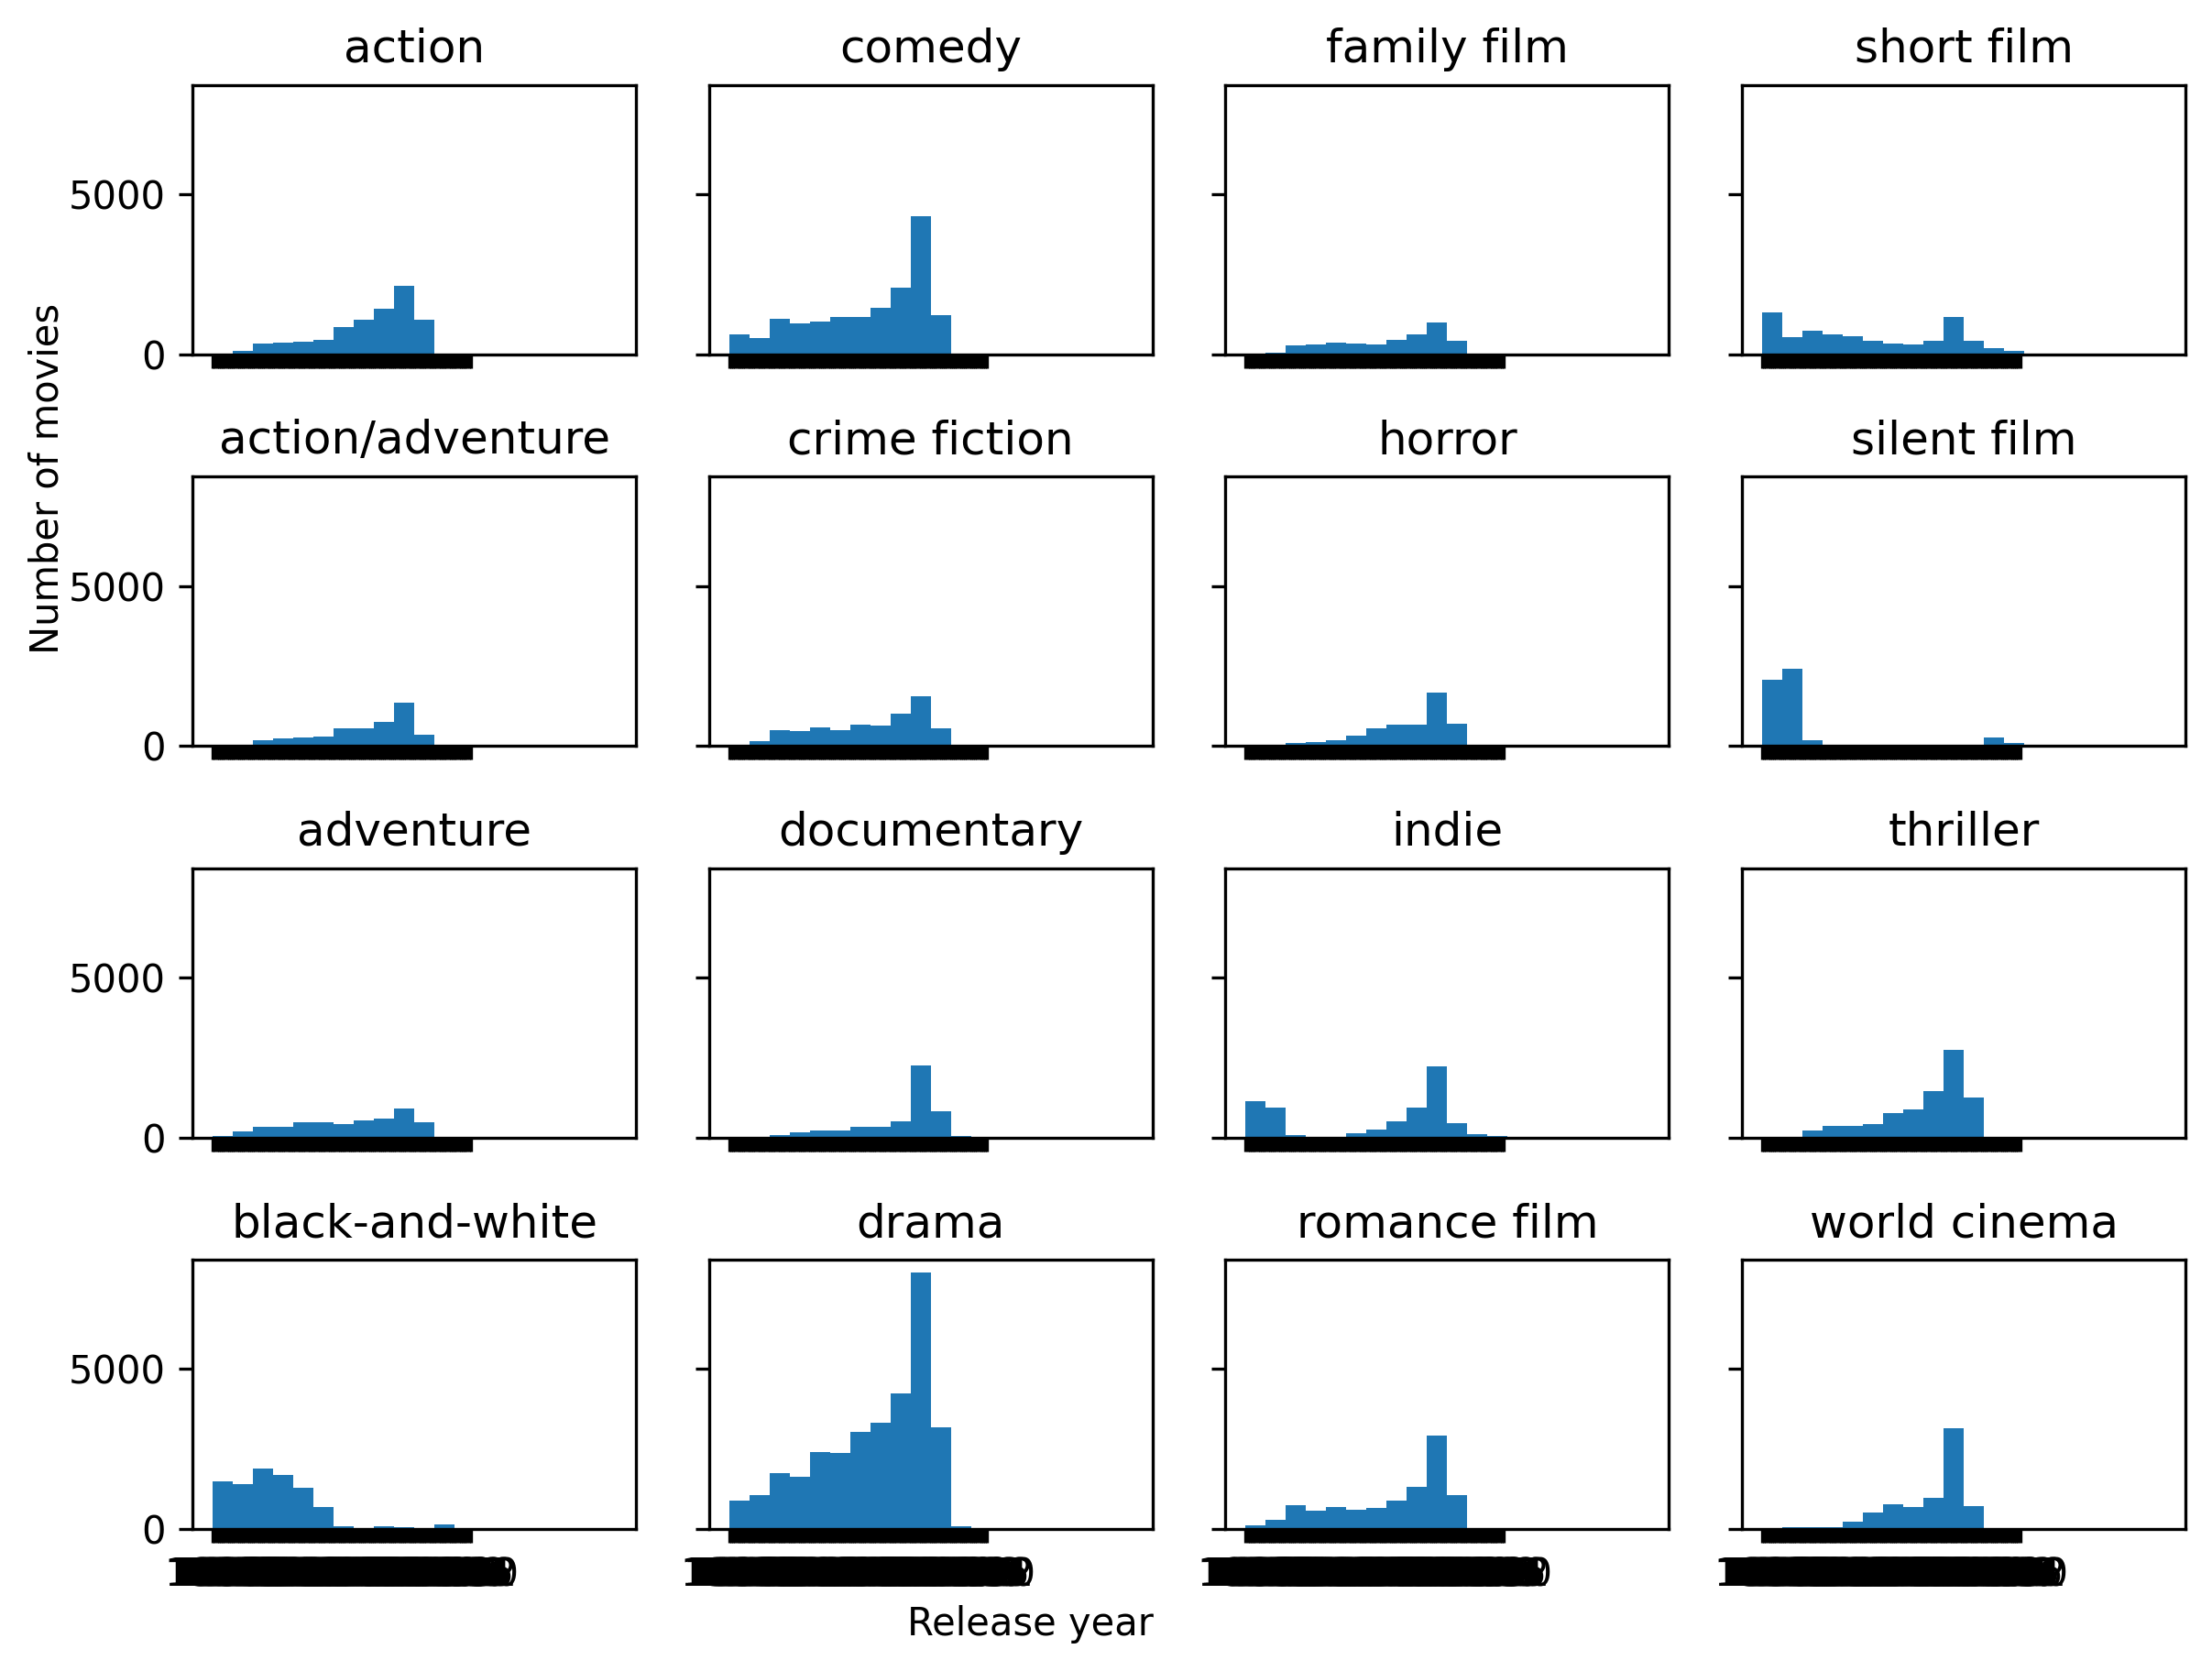

In [24]:
fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(movie_genre.iloc[i].values,range = [0,200],bins = 20)
    sbplt.set_title(movie_genre.index[i])
    
fig.tight_layout()

fig.text(0.4,0, "Release year")
fig.text(0,0.6, "Number of movies", rotation = 90)

### Country

In [25]:
movie_country = pd.merge(movie_df, comes_from_df, on='movie_id')[['release_year', 'country_name']]
movie_country.country_name.value_counts()[:16]
list_countries = ['united states of america', 'india', 'united kingdom', 'france', 'italy', 'japan', 'canada', 'germany', 'argentina', 'hong kong', 'spain', 'australia', 'south korea', 'mexico', 'netherlands', 'sweden']
movie_country = movie_country[movie_country['country_name'].isin(list_countries)]

In [26]:
movie_country = movie_country.groupby('country_name').apply(lambda x: pd.Series({
        'release_year': x['release_year'].values
    }))
movie_country

,release_year
country_name,
argentina,"[1897, 1907, 1909, 1914, 1915, 1917, 1918, 192..."
australia,"[1906, 1907, 1910, 1910, 1910, 1910, 1911, 191..."
canada,"[1913, 1914, 1919, 1931, 1933, 1933, 1934, 193..."
france,"[1892, 1892, 1892, 1895, 1895, 1895, 1895, 189..."
germany,"[1895, 1895, 1895, 1910, 1910, 1912, 1912, 191..."
hong kong,"[1913, 1930, 1930, 1931, 1950, 1955, 1956, 195..."
india,"[1912, 1913, 1919, 1921, 1925, 1928, 1928, 192..."
italy,"[1906, 1909, 1911, 1913, 1913, 1913, 1914, 191..."
japan,"[1917, 1921, 1923, 1926, 1927, 1927, 1927, 192..."


Text(0, 0.6, 'Number of movies')

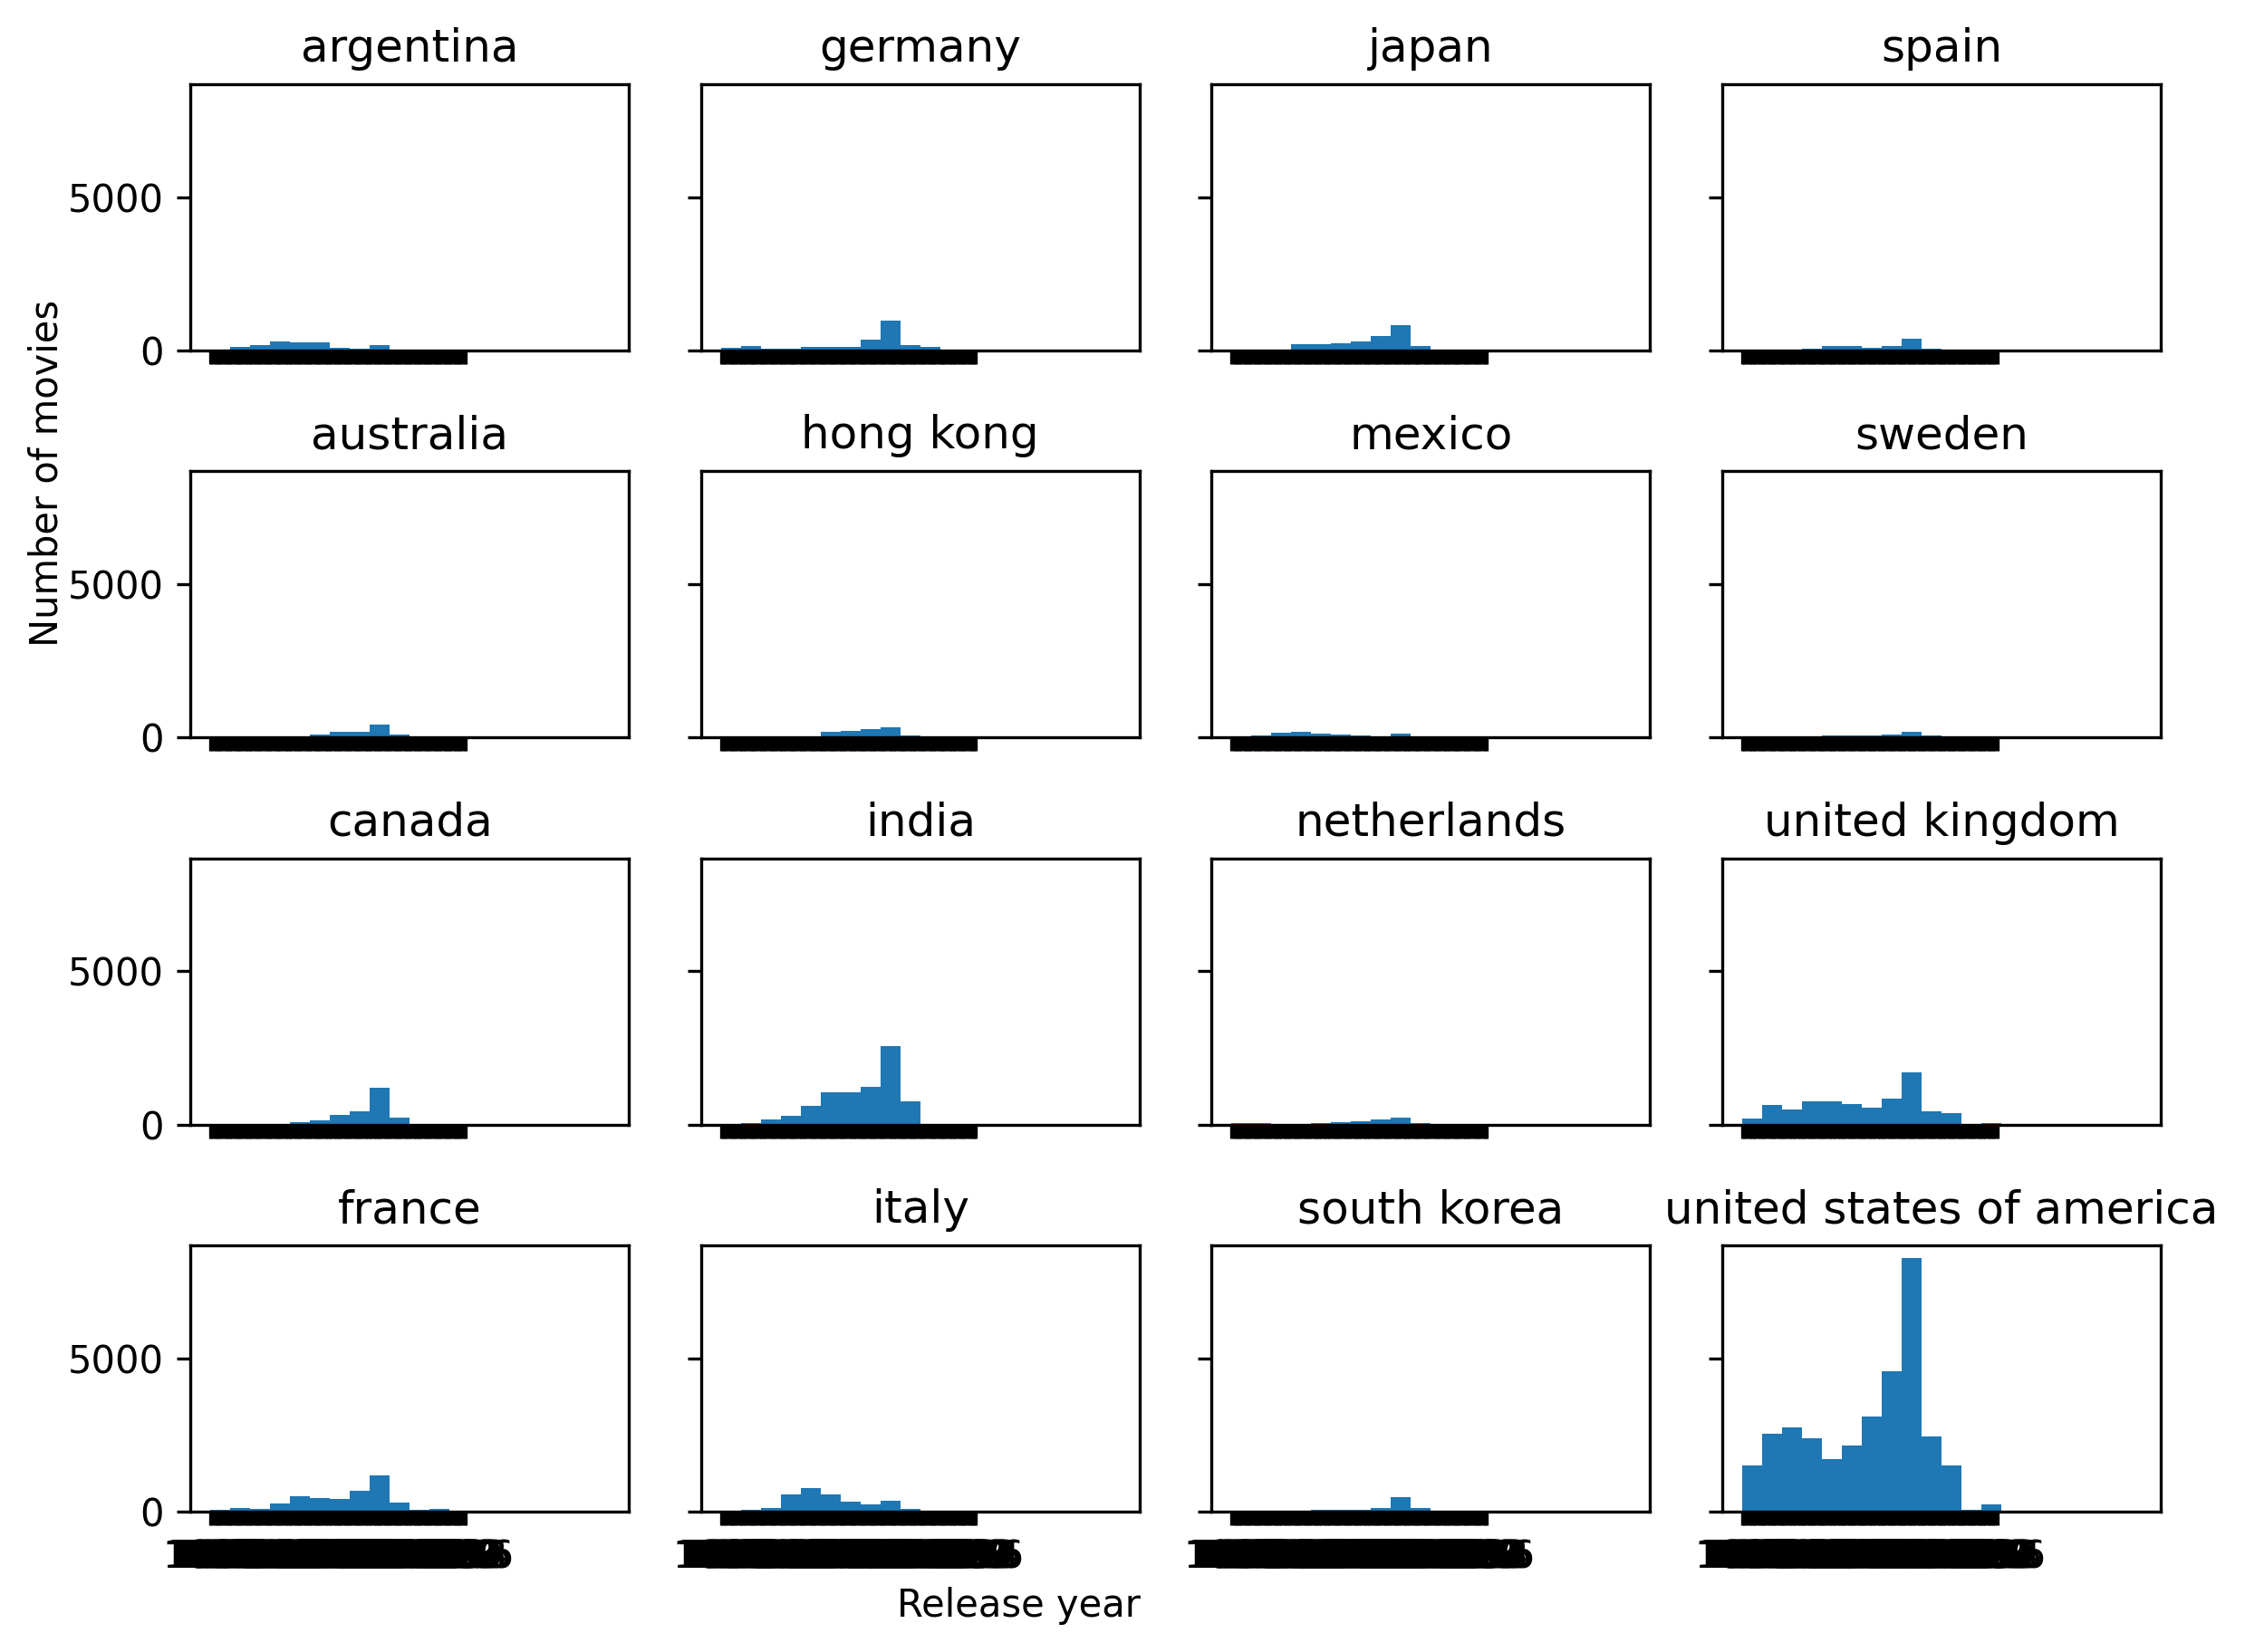

In [27]:
fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(movie_country.iloc[i].values,range = [0,200],bins = 20)
    sbplt.set_title(movie_country.index[i])
    
fig.tight_layout()

fig.text(0.4,0, "Release year")
fig.text(0,0.6, "Number of movies", rotation = 90)